# MNIST

In [28]:
import numpy as np
import pandas as pd

from sklearn.naive_bayes import GaussianNB
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

import matplotlib.pyplot as plt

## Global config

In [29]:
# TODO
path_to_csv = "adult.csv"

## Load data

In [30]:
mnist_28x28_train = np.load("mnist_28x28_train.npy")
mnist_8x8_train = np.load("mnist_8x8_train.npy")
train_labels = np.load("train_labels.npy")

mnist_28x28_test = np.load("mnist_28x28_test.npy")
mnist_8x8_test = np.load("mnist_8x8_test.npy")

## Helpers

In [41]:
# TODO
np.unique(train_labels,return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64),
 array([395, 376, 367, 378, 388, 366, 371, 366, 366, 377], dtype=int64))

##  Data exploration

### Question 1
Hint: `plt.imshow`

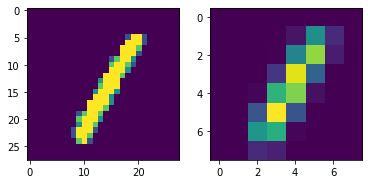

In [32]:
f, axarr = plt.subplots(1,2)

axarr[0].imshow(mnist_28x28_train[0])
axarr[1].imshow(mnist_8x8_train[0])# TODO

##  Data Preparations

### Question 1

In [33]:
# TODO
norm_28x28_train = (mnist_28x28_train/255).reshape((-1,28*28))
norm_8x8_train = (mnist_8x8_train/255).reshape((-1,64))

## Experiments

### Question 1

In [34]:
# TODO
from sklearn.model_selection import train_test_split
x_28_train, x_28_val, y_28_train, y_28_val = train_test_split(norm_28x28_train, train_labels,test_size=0.2)
x_8_train, x_8_val, y_8_train, y_8_val = train_test_split(norm_8x8_train, train_labels,test_size=0.2)

### Question 2

In [44]:
import warnings
warnings.filterwarnings('ignore')

No handles with labels found to put in legend.


<Figure size 720x504 with 0 Axes>

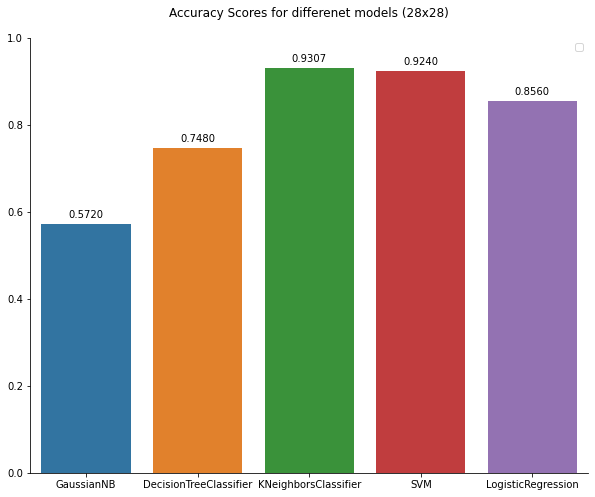

No handles with labels found to put in legend.


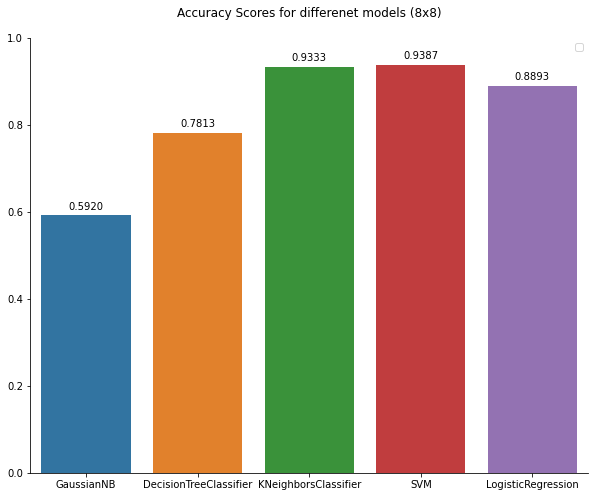

In [105]:
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score

random_state = 42

models = {
    "GaussianNB": GaussianNB(),
    "DecisionTreeClassifier": DecisionTreeClassifier(max_depth=None, min_samples_leaf=2, random_state=random_state),
    "KNeighborsClassifier": KNeighborsClassifier(n_neighbors=3, weights="distance"),
    "SVM": SVC(kernel="poly",C=10,random_state=42),
    "LogisticRegression": LogisticRegression(C=10,random_state=42)
}

plt.figure(figsize = (10,7))
accuracy28 = []
accuracy8 = []

for name, model in models.items():
    model.fit(x_28_train,y_28_train)
    prediction = model.predict(x_28_val)
    accuracy28.append(accuracy_score(y_28_val, prediction))
    model.fit(x_8_train,y_8_train)
    prediction = model.predict(x_8_val)
    accuracy8.append(accuracy_score(y_8_val, prediction))
    
import seaborn as sns
print('\n')
plt.figure(figsize=(10,8))
splot = sns.barplot(list(models.keys()),accuracy28)
sns.despine(top=True, right=True, left=False, bottom=False)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.4f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.legend()
plt.ylim([0.0,1.0])
plt.title('Accuracy Scores for differenet models (28x28)\n')
plt.savefig("28x28 accuracy")
plt.show()

plt.figure(figsize=(10,8))
splot = sns.barplot(list(models.keys()),accuracy8)
sns.despine(top=True, right=True, left=False, bottom=False)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.4f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.legend()
plt.ylim([0.0,1.0])
plt.title('Accuracy Scores for differenet models (8x8)\n')
plt.savefig("8x8 accuracy")
plt.show()

# plt.xlabel('False Positive Rate')
# plt.xlabel('True negaitive Rate')
#plt.savefig("F1 score.jpg")
# TODO

### Question 3

In [90]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV

grid_scores28=[]
grid_scores8=[]

scoring_method_accuracy = make_scorer(lambda prediction, true_target: accuracy_score(prediction, true_target))
model_parameters = {
    "GaussianNB": {
    },
    "DecisionTreeClassifier": {
        'max_depth': [None, 2,3,4,5,6,7,8,9,10],
        'random_state' : [42],
        'min_samples_leaf': [2,3,4]
    },
    # START ANSWER
    
    "KNeighborsClassifier": {
         'n_neighbors': [1,3,5,7,9,11,1],
         'weights': ['uniform' , 'distance'],
         'p': [1,2]   
    },
    "SVM": {
        'C': [0.1,10],
        'random_state' : [42],
        'kernel' : ['poly', 'sigmoid']
    },
    "LogisticRegression": {
        'C': [0.001,1.0,4,5,10],
        'penalty': ['l1', 'l2', 'elasticnet', 'none'],
        'random_state' : [42]
    }}

for model_name, parameters in model_parameters.items():
        model = models[model_name]
    
        grid_search28 = GridSearchCV(model, parameters,n_jobs=-1, verbose=False,scoring=scoring_method_accuracy).fit(x_28_train, y_28_train)
        grid_search8 = GridSearchCV(model, parameters,n_jobs=-1, verbose=False,scoring=scoring_method_accuracy).fit(x_8_train, y_8_train)
    
        best_model28 = grid_search28.best_estimator_ 
        best_score28 = grid_search28.best_score_
        best_params28 = grid_search28.best_params_
        
        best_model8 = grid_search8.best_estimator_
        best_score8 = grid_search8.best_score_
        best_params8 = grid_search8.best_params_
        
        predicts=best_model28.predict(x_28_val)
        grid_scores28.append(accuracy_score(y_28_val,predicts))
        print('******************',model_name, '***********************')
        print('\nFor 28x28 Images')
        print("- best_score =", best_score28)
        print("best paramters:")
        for k,v in best_params28.items():
            print("-", k, v)
            
            
            
        predicts=best_model8.predict(x_8_val)
        grid_scores8.append(accuracy_score(y_8_val,predicts))
#         print('******************',model_name, '***********************')
        print('\nFor 8x8 Images')
        print("- best_score =", best_score8)
        print("best paramters:")
        for k,v in best_params8.items():
            print("-", k, v)

****************** GaussianNB ***********************

For 28x28 Images
- best_score = 0.5690000000000001
best paramters:

For 8x8 Images
- best_score = 0.5469999999999999
best paramters:
****************** DecisionTreeClassifier ***********************

For 28x28 Images
- best_score = 0.7293333333333333
best paramters:
- max_depth 9
- min_samples_leaf 2
- random_state 42

For 8x8 Images
- best_score = 0.7543333333333333
best paramters:
- max_depth None
- min_samples_leaf 3
- random_state 42
****************** KNeighborsClassifier ***********************

For 28x28 Images
- best_score = 0.9186666666666665
best paramters:
- n_neighbors 1
- p 2
- weights uniform

For 8x8 Images
- best_score = 0.9196666666666665
best paramters:
- n_neighbors 5
- p 2
- weights distance
****************** SVM ***********************

For 28x28 Images
- best_score = 0.9216666666666666
best paramters:
- C 10
- kernel poly
- random_state 42

For 8x8 Images
- best_score = 0.9223333333333334
best paramters:
- C 

### Question 4 

No handles with labels found to put in legend.


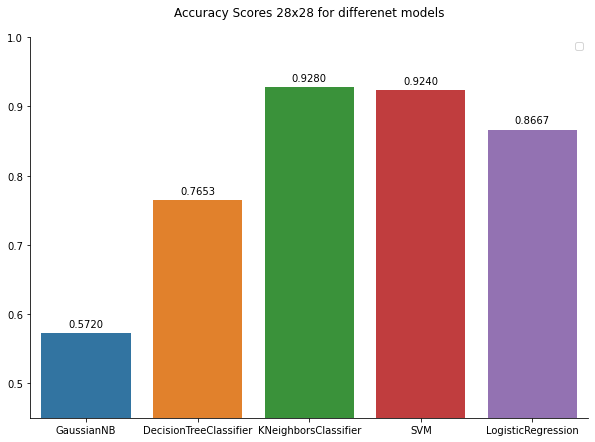

No handles with labels found to put in legend.


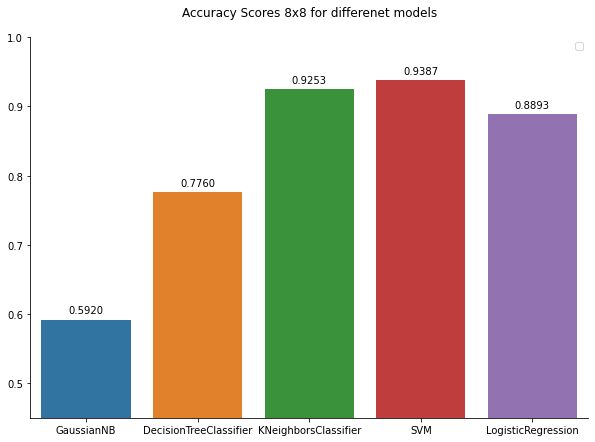

In [106]:
plt.figure(figsize = (10,7))
splot = sns.barplot(list(models.keys()),grid_scores28)
sns.despine(top=True, right=True, left=False, bottom=False)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.4f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.legend()
plt.ylim([0.45, 1.0])
plt.title('Accuracy Scores 28x28 for differenet models\n')
plt.savefig("tuning28.jpg")
plt.show()



# for p in splot.patches:
#     splot.annotate(format(p.get_height(), '.1f'), 
#                    (p.get_x() + p.get_width() / 2., p.get_height()), 
#                    ha = 'center', va = 'center', 
#                    xytext = (0, 9), 
#                    textcoords = 'offset points')

plt.figure(figsize = (10,7))
splot = sns.barplot(list(models.keys()),grid_scores8)
sns.despine(top=True, right=True, left=False, bottom=False)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.4f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.legend()
plt.ylim([0.45, 1.0])
plt.title('Accuracy Scores 8x8 for differenet models\n')
plt.savefig("tuning8.jpg")
plt.show()


### Question 5

In [11]:
#TODO

### Question 6

In [100]:
finalModel = SVC(kernel="poly",C=10,random_state=42)
finalModel.fit((mnist_8x8_train/255).reshape((-1,64)),train_labels)
prediction = finalModel.predict((mnist_8x8_test/255).reshape((-1,64)))
pd.DataFrame(prediction).to_csv("GROUP_classes_problem_mnist.txt", index=False, header=False)